In [1]:
# Import necessary packages
import os
import numpy as np
import pandas as pd
import random

# Data Load & Pre-processing

In [2]:
# input folder
data_root = os.path.join(os.getcwd(),'input')

In [3]:
from data_preprocessing import *

In [4]:
df = load_data_from_local(data_root)
df.head(5)

Meta data size: 9022
c:\Users\pywong\Desktop\PolyU\COMP5434 Big Data Computing\Assignment\COMP5434-Big-Data-Computing\input\subset\subset\document_parses\pdf_json
total json files: 12000


100%|██████████| 8083/8083 [00:31<00:00, 257.75it/s]
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


,doc_num,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,language,processed_text
0,0,0015cecc2298c3bdb9bda0e0b84b38ebdcca716f,10.1007/s40744-022-00425-0,Coronavirus disease 2019 caused by the severe ...,Systemic inflammation is the hallmark of coron...,"Drosos, Alexandros A.. Pelechas, Eleftherios...",Colchicine Against SARS-CoV-2 Infection: What ...,Rheumatol Ther,Coronavirus disease 2019 caused by the severe ...,en,systemic inflammation is the hallmark of coron...
1,1,0016a5c32e9cea6002cf6f352ecdb5231c7e3194,10.30699/ijp.2020.127312.2387,,Severe acute respiratory syndrome coronavirus ...,"Abdollahi, Alireza. shakoori, Abbas...",Comparison of Patient-collected and Lab Techni...,Iran J Pathol,Severe acute respiratory syndrome coronavirus ...,en,severe acute respiratory syndrome coronavirus ...
2,2,0020e5c796f50e927b96ff0b7ea375b4745261a3,10.1186/s12887-020-02112-x,Background: One major limitation for less inva...,Respiratory Distress Syndrome (RDS) affects 85...,"Chevallier, Marie. Durrmeyer, Xavier...",Propofol versus placebo (with rescue with keta...,BMC Pediatr,Background: One major limitation for less inva...,en,respiratory distress syndrome rds affects 85 o...
3,3,00234390dbc45e3370ac8f80cbd93cec3777ca92,10.1016/j.ajur.2021.03.006,Objective: To identify the impact of COVID-19 ...,The World Health Organization (WHO) has announ...,"Raheem Ali, Abdel. Ghazwani, Yahya...",Impact of COVID-19 on endourology surgical pra...,Asian J Urol,Objective: To identify the impact of COVID-19 ...,en,the world health organization who has announce...
4,4,0025fd87cfaf7953079b618771218b8de6893928,10.3389/fcell.2021.748905,,"The concept of specialized ""membrane microdoma...","Garofalo, Tina. Misasi, Roberta...",Editorial: Targeting Lipid Rafts as a Strategy...,Front Cell Dev Biol,"The concept of specialized ""membrane microdoma...",en,the concept of specialized membrane microdomai...


NLP

In [ ]:
# NOTE: This section is directly copied from the script showed in lecture 5.
# For reference only. Do not use the code directly for project submission.

In [ ]:
# NOTE: Keep for reference now, consolidate to data_preprocessing.py later

In [ ]:
#NLP
import spacy
from spacy.lang.en_stop_words import STOP_WORDS
# import en_core_sci_lg

In [ ]:
import string

punctuations = string.punctuation
punctuations
# stopwords = list(STOP_WORDS)
# stopwords[0:10]

In [ ]:
custom_stop_words = [
    'doi','preprint','copyright','peer','reviewed','org','https','et','al','author','figure',
    'rights','reserved','permission','used','using','biorxiv','medrxiv','license','fig','fig.',
    'al.','Elsevier','PMC','CZI'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [ ]:
# Parser
#parser = en_core_sci_lg.load(disable=["tagger","ner"])
#nlp = spacy.load('en_core_web_sm',disable=["tagger","ner"])
nlp = spacy.load('en_core_web_sm',disable=["tagger","parser","ner"]) # Only tokenization and lemmation are performed, POS tagging, NER and syntactic parsing are skipped.
nlp.max_length = 7000000

stopwords = set(stopwords)
punctuations = set(punctuations)
print('len(stopwords):',len(stopwords),'len(punctuations):',len(punctuations))

def spacy_tokenizer(sentence):
    mytokens = nlp(sentence)
    mytokens = [word.lemma_.lower().strip() if word.lemma != '-PORN-' else word.lower_ for word in mytokens]
    mytokens = [word for word in mytokens if word not in stopwords and word not in punctuations]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

tqdm.pandas()
df['procesed_text'] = df['body_text'].progress_apply(spacy_tokenizer)



PCA & Clustering

In [ ]:
# NOTE: This section is directly copied from the script showed in lecture 5.
# For reference only. Do not use the code directly for project submission.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

# PCA
pca = PCA(n_components=0.95,random_state=42)
X_reduced = pca.fit_transform(X.toarray())
X_reduced.shape

# K Mean Clustering
k = 10
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

TSNE Visualization

In [ ]:
# NOTE: This section is directly copied from the script showed in lecture 5.
# For reference only. Do not use the code directly for project submission.

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

tsne = TSNE(verbose=1,perplexity=50) # Change perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X.toarray())

# sns setting
sns.set(rc={'figure.figsize':(15,15)})

# color
palette = sns.color_palette('bright',1)

# plot
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1],palette=palette)
plt.title('t-SNE with no Labels')
plt.savefig('t-sne_covid19.png')
plt.show()



In [ ]:
# sns settings
sns.set(rc={'figure.figsize':(13,9)})

# color
palette = sns.color_palette(20,l=4,s=0.9)

# plot
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1],hue=y_pred, legend='full',palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig('improved_cluster_tsne.png')
plt.show()


# Histogram of year / journal

In [ ]:
# Histogram of year / journal
# Convert publish_time to datetime
meta_df['publish_time'] = pd.to_datetime(meta_df['publish_time'], errors='coerce')

# Drop rows with NaT values in publish_time
meta_df = meta_df.dropna(subset=['publish_time'])

# Plot histogram of publication years
plt.figure(figsize=(12, 6))
ax = meta_df['publish_time'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Histogram of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Papers')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Plot histogram of journals
plt.figure(figsize=(12, 6))
ax = df['journal'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Journals by Number of Papers')
plt.xlabel('Journal')
plt.ylabel('Number of Papers')
plt.xticks(rotation=90)

# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Filter years with too many or too few data points
min_threshold = 10  # Minimum number of papers for a year to be considered
max_threshold = 1000  # Maximum number of papers for a year to be considered
year_counts = meta_df['publish_time'].dt.year.value_counts()
filtered_years = year_counts[(year_counts >= min_threshold) & (year_counts <= max_threshold)].index

# Filter the dataframe
filtered_meta_df = meta_df[meta_df['publish_time'].dt.year.isin(filtered_years)]

# Plot filtered histogram of publication years
plt.figure(figsize=(12, 6))
ax = filtered_meta_df['publish_time'].dt.year.value_counts().sort_index().plot(kind='bar')
plt.title('Filtered Histogram of Publication Years')
plt.xlabel('Year')
plt.ylabel('Number of Papers')

# Add labels to each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Map-Reduce 

# Similarity Analysis

Input

In [5]:
# pick a target document to compare
target_doc_num = 0

# input feature size (number of token used)
feature_size = 2**12

random.seed(10)

Import library used for this section

In [6]:
from similarity_analysis import *

Define characteristic matrix by tokenizing the processed text

In [7]:
# Build feature with token count
count_vectorizer = CountVectorizer(max_features=feature_size)
X_count = count_vectorizer.fit_transform(df['processed_text'].values).toarray().T

# Clip count between 0 and 1 to only consider the token exists in document or not
X_clip = np.clip(X_count, 0, 1)

# Use TF-IDF as feature to only consider interseting words
tfidf_vectorizer = TfidfVectorizer(max_features=feature_size)
X_tfidf = tfidf_vectorizer.fit_transform(df['processed_text'].values).toarray().T

In [8]:
count_result = check_document_similarity(X_count,df,target_doc_num)
clip_result = check_document_similarity(X_clip,df,target_doc_num)
tfidf_result = check_document_similarity(X_tfidf,df,target_doc_num)

## MinHash

Using token occurrence as document feature. Create a signature matrix using MinHash.
Compare the signature Jaccard similarity with the document L1 Norm (Hamming distance).

In [11]:
# Input to test the minhash performance
num_perm_list = list(range(100,300+1,100))

In [12]:
permutation_dict = minhash_with_different_permutation(df,X_clip,clip_result,target_doc_num,num_perm_list)
minhash_fine_turn_result = compare_minhash_fine_tune(permutation_dict)
minhash_fine_turn_result

,num_perm,correlation,pvalue
2,300,0.373221,3.355262e-264
1,200,0.233148,1.032975e-99
0,100,0.358382,2.658502e-242


<Axes: xlabel='sig_jaccard_similarity'>

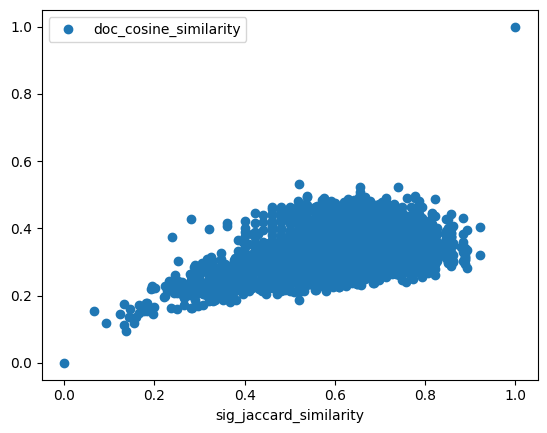

In [13]:
optimal_perm_num = int(minhash_fine_turn_result.sort_values(by=['correlation'],ascending=False).head(1)['num_perm'].values)
minhash_result = permutation_dict[optimal_perm_num]
minhash_result.plot(x='sig_jaccard_similarity', y='doc_cosine_similarity', style='o')

In [14]:
minhash_result[['doc_num','sig_jaccard_similarity','abstract_summary']].head(10)

,doc_num,sig_jaccard_similarity,abstract_summary
0,0,1.000000,Coronavirus disease 2019 caused by the severe ...
1643,1643,0.923077,This study estimates agricultural land resourc...
3221,3221,0.923077,"Background. The characteristics, determinants,..."
6714,6714,0.892857,Supporting adolescents and young adults (AYAs)...
234,234,0.892857,Antibacterial activity is regarded as the abil...
3644,3644,0.892857,The purpose of this article is to delineate th...
6657,6657,0.888889,The entry into parenthood has been increasingl...
7469,7469,0.888889,Neuroendocrine carcinomas of the uterine cervi...
7903,7903,0.888889,Inconsistencies are evident in definitions and...
5664,5664,0.888889,Background The outbreak of Coronavirus disease...


## SimHash

Using TF-IDF as document feature. Create a signature matrix using SimHash.
Compare the signature Hamming distance with the document cosine similarity.

In [15]:
tfidf_feature_list = list(tfidf_vectorizer.get_feature_names_out())

feature_hash_md5 = get_feature_hash(tfidf_feature_list,'md5')
finger_print_list_md5 = get_finger_print_list(X_tfidf,feature_hash_md5)

feature_hash_sha1 = get_feature_hash(tfidf_feature_list,'sha1')
finger_print_list_sha1 = get_finger_print_list(X_tfidf,feature_hash_sha1)

In [16]:
# Check Performance
tfidf_result = check_document_similarity(X_tfidf,df,target_doc_num)

md5 = check_simhash_similarity(finger_print_list_md5,target_doc_num)
md5 = tfidf_result.merge(md5,how='outer',on='doc_num')
md5 = md5.sort_values(by=['sig_hamming_distance'],ascending=True)

sha1 = check_simhash_similarity(finger_print_list_sha1,target_doc_num)
sha1 = tfidf_result.merge(sha1,how='outer',on='doc_num')
sha1 = sha1.sort_values(by=['sig_hamming_distance'],ascending=True)

if pearsonr(md5['doc_cosine_similarity'],md5['sig_hamming_distance']).statistic < pearsonr(sha1['doc_cosine_similarity'],sha1['sig_hamming_distance']).statistic:
    simhash_result = md5
else:
    simhash_result = sha1

PearsonRResult(statistic=-0.7730891301719717, pvalue=0.0)


<Axes: xlabel='doc_cosine_similarity'>

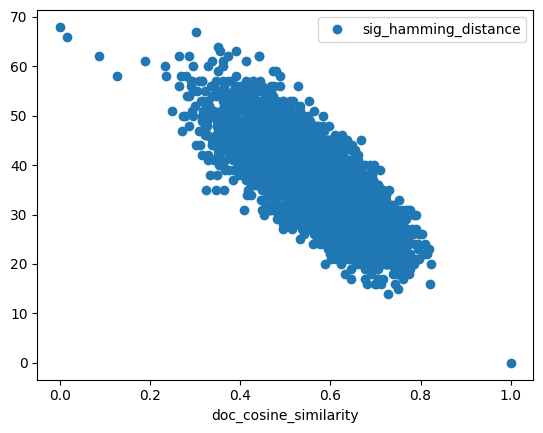

In [17]:
print(pearsonr(md5['doc_cosine_similarity'],md5['sig_hamming_distance']))
md5.plot(x='doc_cosine_similarity', y='sig_hamming_distance', style='o')

PearsonRResult(statistic=-0.7889262932924689, pvalue=0.0)


<Axes: xlabel='doc_cosine_similarity'>

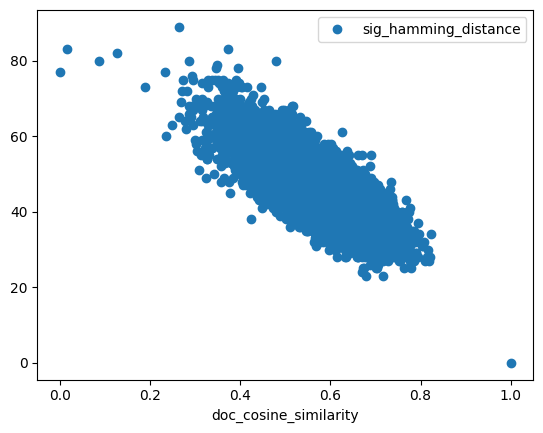

In [18]:
print(pearsonr(sha1['doc_cosine_similarity'],sha1['sig_hamming_distance']))
sha1.plot(x='doc_cosine_similarity', y='sig_hamming_distance', style='o')

In [19]:
simhash_result[['doc_num','sig_hamming_distance','abstract_summary']].head(10)

,doc_num,sig_hamming_distance,abstract_summary
0,0,0,Coronavirus disease 2019 caused by the severe ...
4797,4797,23,has become the established method by which hea...
7155,7155,23,While some acute pancreatitis (AP) patents wit...
4220,4220,24,While it has been more than a year since the i...
4538,4538,25,Background: African Potato (hypoxis hemerocall...
4208,4208,25,Introduction: As of the 2020 National Resident...
7669,7669,25,Conceptual abstraction and analogy-making are ...
2158,2158,25,"In IWOCA 2019, Ruangwises and Itoh introduced ..."
7543,7543,25,"Recently, a highly contagious novel coronaviru..."
5420,5420,25,NaN


## Doc2Vec

Word2Vec also need to consider token position for word embeding. Use the original text instead of the processed text for vectorization.

In [20]:
# Use pretrained model to tokenize the documents.
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [21]:
# Use abstract summary instaed of body_test since it has less tokens.
original_docs = list(df['abstract_summary'])
tagged_docs = tag_documents(tokenizer,original_docs)

In [22]:
model = Doc2Vec()
model.build_vocab(tagged_docs)
model.train(tagged_docs,total_examples=model.corpus_count,epochs=20)

doc2vec_result = get_doc2vec_result(model,tokenizer,original_docs,target_doc_num,df)
doc2vec_result[['doc_num','doc2vec','abstract_summary']].head(10)

,doc_num,doc2vec,abstract_summary
0,0,1,Coronavirus disease 2019 caused by the severe ...
1,1310,2,Background: Specific details about cardiovascu...
2,4680,3,facilities are provided and maintained within ...
3,4414,4,Background: Influenza C virus (ICV) is associa...
4,144,5,"For enveloped viruses, fusion of the viral env..."
5,7064,6,Objectives: Local hospitals are operated by th...
6,5894,7,I've got a secret I've been hiding Under my sk...
7,5645,8,Background COVID-19 pandemic is an unprecedent...
8,301,9,NaN
9,5718,10,T he Child Health and Mortality Prevention Sur...


## Comparsion

Comparing the performance of different document similarity search methods with the cosine similarity of document with TF-IDF word embeding.

In [23]:
combine_result = get_combined_similarity_result(tfidf_result,count_result,clip_result,minhash_result,simhash_result,doc2vec_result)
rank_df = get_performance_rank(tfidf_result,count_result,clip_result,minhash_result,simhash_result,doc2vec_result)
rank_diff_df = get_performance_rank_diff(rank_df)

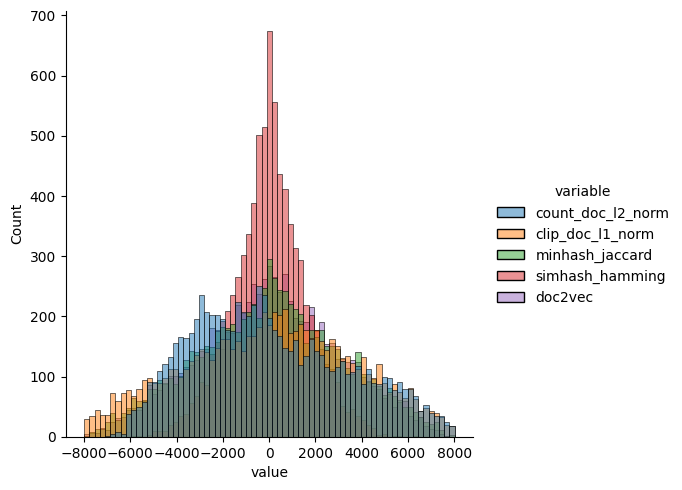

In [24]:
plot_df = rank_diff_df.drop(columns=['doc_num','tfidf_doc_cosine']).melt()
sns.displot(plot_df, x='value', hue='variable')

In [25]:
var_rank_diff = rank_diff_df.drop(columns=['doc_num']).var(axis=0)
var_rank_diff = var_rank_diff.reset_index().rename(columns={'index':'metric',0:'variance'})
var_rank_diff = var_rank_diff.sort_values(by=['variance'],ascending=True)
var_rank_diff

,metric,variance
4,simhash_hamming,2.538154e+06
0,tfidf_doc_cosine,5.388810e+06
5,doc2vec,8.853386e+06
3,minhash_jaccard,9.733296e+06
1,count_doc_l2_norm,1.094450e+07
2,clip_doc_l1_norm,1.299531e+07


# Association Analysis

# Clustering Analysis